In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df=pd.read_csv('earthquakes-2000-01-01-2023-02-12.csv')
df.head(5)

Unnamed: 0                      time  latitude  longitude  depth  mag  \
0           0  2000-01-01T01:19:26.990Z   41.9270     20.543   10.0  4.5   
1           1  2000-01-01T02:10:15.590Z   41.9150     20.534    6.2  2.9   
2           2  2000-01-01T02:12:13.450Z  -11.3480    164.568   33.0  4.3   
3           3  2000-01-01T03:20:57.300Z   48.1190     -2.959    3.0  2.7   
4           4  2000-01-01T03:24:23.217Z   62.7531   -150.301   93.3  2.5   

  magType  nst  gap  dmin  ...                   updated  \
0      mb  NaN  NaN   NaN  ...  2014-11-07T01:09:14.397Z   
1      md  NaN  NaN   NaN  ...  2014-11-07T01:09:14.652Z   
2      mb  NaN  NaN   NaN  ...  2014-11-07T01:09:14.702Z   
3      ml  NaN  NaN   NaN  ...  2014-11-07T01:09:14.711Z   
4      ml  NaN  NaN   NaN  ...  2020-02-20T20:06:40.502Z   

                                 place        type horizontalError depthError  \
0          14 km SW of Dragash, Kosovo  earthquake             NaN        NaN   
1          15 km SW of Dragash, Kosovo  earthquake             NaN        NaN   
2  150 km WSW of Lata, Solomon Islands  earthquake             NaN        NaN   
3         2 km ESE of Neulliac, France  earthquake             NaN        NaN   
4           35 km NNW of Chase, Alaska  earthquake             NaN        3.2   

  magError  magNst    status  locationSource  magSource  
0      NaN    18.0  reviewed              us         us  
1      NaN     NaN  reviewed             pdg        pdg  
2      NaN     2.0  reviewed              us         us  
3      NaN     NaN  reviewed             ldg        ldg  
4      NaN     NaN  reviewed              ak         ak  

[5 rows x 23 columns]

## Data cleaning and feature extraction

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613787 entries, 0 to 613786
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       613787 non-null  int64  
 1   time             613787 non-null  object 
 2   latitude         613787 non-null  float64
 3   longitude        613787 non-null  float64
 4   depth            613787 non-null  float64
 5   mag              613787 non-null  float64
 6   magType          613786 non-null  object 
 7   nst              383307 non-null  float64
 8   gap              498837 non-null  float64
 9   dmin             257169 non-null  float64
 10  rms              506393 non-null  float64
 11  net              613787 non-null  object 
 12  id               613787 non-null  object 
 13  updated          613787 non-null  object 
 14  place            612432 non-null  object 
 15  type             613787 non-null  object 
 16  horizontalError  257113 non-null  floa

In [3]:
df=df.drop('horizontalError', axis=1)
df=df.drop('magError', axis=1)
df=df.drop('type', axis=1)
df=df.drop('dmin', axis=1)
df=df.drop('updated', axis=1)
df=df.drop('Unnamed: 0', axis=1)
df=df.drop('id',axis=1)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613787 entries, 0 to 613786
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            613787 non-null  object 
 1   latitude        613787 non-null  float64
 2   longitude       613787 non-null  float64
 3   depth           613787 non-null  float64
 4   mag             613787 non-null  float64
 5   magType         613786 non-null  object 
 6   nst             383307 non-null  float64
 7   gap             498837 non-null  float64
 8   rms             506393 non-null  float64
 9   net             613787 non-null  object 
 10  place           612432 non-null  object 
 11  depthError      401781 non-null  float64
 12  magNst          403298 non-null  float64
 13  status          613787 non-null  object 
 14  locationSource  613787 non-null  object 
 15  magSource       613787 non-null  object 
dtypes: float64(9), object(7)
memory usage: 74.9+ MB


In [5]:
df['gap'].fillna(df['gap'].median(),inplace=True)

In [6]:
df['nst'].fillna(df['nst'].median(),inplace=True)

In [7]:
df['rms'].fillna(df['rms'].median(),inplace=True)

In [8]:
df['depthError'].fillna(df['depthError'].median(),inplace=True)

In [9]:
df['magNst'].fillna(df['magNst'].median(),inplace=True)

In [10]:
df.isna().sum()

time                 0
latitude             0
longitude            0
depth                0
mag                  0
magType              1
nst                  0
gap                  0
rms                  0
net                  0
place             1355
depthError           0
magNst               0
status               0
locationSource       0
magSource            0
dtype: int64

In [11]:
df['place'].value_counts()

South Sandwich Islands region                   6331
south of the Fiji Islands                       5990
Fiji region                                     4396
Rat Islands, Aleutian Islands, Alaska           4365
Kermadec Islands region                         4301
                                                ... 
3 km SW of Manoláda, Greece                        1
16 km NE of Ljubinje, Bosnia and Herzegovina       1
49 km SSE of Puerto El Triunfo, El Salvador        1
22 km ENE of Al Marj, Libya                        1
2 km SSW of Basco, Philippines                     1
Name: place, Length: 257265, dtype: int64

In [12]:
df['place'].fillna("South Sandwich Islands region", inplace=True)

In [13]:
df.isna().sum()

time              0
latitude          0
longitude         0
depth             0
mag               0
magType           1
nst               0
gap               0
rms               0
net               0
place             0
depthError        0
magNst            0
status            0
locationSource    0
magSource         0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613787 entries, 0 to 613786
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   time            613787 non-null  object 
 1   latitude        613787 non-null  float64
 2   longitude       613787 non-null  float64
 3   depth           613787 non-null  float64
 4   mag             613787 non-null  float64
 5   magType         613786 non-null  object 
 6   nst             613787 non-null  float64
 7   gap             613787 non-null  float64
 8   rms             613787 non-null  float64
 9   net             613787 non-null  object 
 10  place           613787 non-null  object 
 11  depthError      613787 non-null  float64
 12  magNst          613787 non-null  float64
 13  status          613787 non-null  object 
 14  locationSource  613787 non-null  object 
 15  magSource       613787 non-null  object 
dtypes: float64(9), object(7)
memory usage: 74.9+ MB


In [15]:
df['magType'].value_counts()

mb         276372
ml         186635
md          88012
mwc         17179
Md           9693
mww          9300
mwr          7719
m            7417
mblg         2837
mw           2805
mwb          2636
mb_lg        1799
mc            393
mlr           259
mh            255
ms            197
mlg           168
Ml             60
Mb             20
mlv            10
mwp             8
ms_20           6
ma              4
Unknown         1
Mi              1
Name: magType, dtype: int64

In [16]:
df['magType']=df['magType'].replace('Unknown','mb')

In [17]:
df['magType'].value_counts()

mb       276373
ml       186635
md        88012
mwc       17179
Md         9693
mww        9300
mwr        7719
m          7417
mblg       2837
mw         2805
mwb        2636
mb_lg      1799
mc          393
mlr         259
mh          255
ms          197
mlg         168
Ml           60
Mb           20
mlv          10
mwp           8
ms_20         6
ma            4
Mi            1
Name: magType, dtype: int64

In [18]:
def correct_magType(magType) :
      if magType =='mwc':
         return 'mw'
      elif magType =='mww':
         return 'mw'
      elif magType =='mwr':
         return 'mw'
      elif magType == 'mwp':
         return 'mw'
      elif magType == 'mwb':
         return 'mw'
      elif magType == 'Md':
         return 'md'
      elif magType =='Mb':
         return 'mb'
      elif magType =='mblg':
         return 'mb'
      elif magType == 'mb_lg':
         return 'mb'
      elif magType == 'ms_20':
         return 'ms'
      elif magType == 'mlr':
         return 'ml'
      elif magType =='mlv':
         return 'ml'
      elif magType =='mlg':
         return 'ml'
      elif magType == 'Ml':
           return 'ml'
      elif magType =='Mi':
         return 'mi'
      else:
           return  magType

In [19]:
df['magType']=df['magType'].apply(correct_magType)

In [20]:
df['magType'].value_counts()

mb    281029
ml    187132
md     97705
mw     39647
m       7417
mc       393
mh       255
ms       203
ma         4
mi         1
Name: magType, dtype: int64

In [21]:
from datetime import datetime ,  date
df['time']=pd.to_datetime(df['time'])

In [22]:
df['year']=df['time'].dt.year
df['month']=df['time'].dt.month
df['hour']=df['time'].dt.hour
df['day_name']=df['time'].dt.day_name()

In [23]:
df.head(20)

time   latitude   longitude    depth   mag  \
0  2000-01-01 01:19:26.990000+00:00  41.927000   20.543000   10.000  4.50   
1  2000-01-01 02:10:15.590000+00:00  41.915000   20.534000    6.200  2.90   
2  2000-01-01 02:12:13.450000+00:00 -11.348000  164.568000   33.000  4.30   
3  2000-01-01 03:20:57.300000+00:00  48.119000   -2.959000    3.000  2.70   
4  2000-01-01 03:24:23.217000+00:00  62.753100 -150.301000   93.300  2.50   
5  2000-01-01 03:47:33.970000+00:00  38.348000   12.009000   10.000  3.40   
6  2000-01-01 03:58:39.500000+00:00  34.801000 -116.287000    5.414  3.04   
7  2000-01-01 04:02:24.880000+00:00  35.430000   22.498000   33.000  3.40   
8  2000-01-01 04:30:10.370000+00:00 -26.012000  -68.803000  105.000  4.50   
9  2000-01-01 05:13:59.100000+00:00  38.970000   26.100000   35.000  3.40   
10 2000-01-01 05:17:12.900000+00:00  38.890000   25.850000   22.000  3.60   
11 2000-01-01 05:24:35.290000+00:00  36.874000   69.947000   54.300  5.10   
12 2000-01-01 05:43:40.030000+00:00  37.145000   69.946000   33.000  3.80   
13 2000-01-01 05:58:19.780000+00:00 -60.722000  153.670000   10.000  6.00   
14 2000-01-01 06:04:10.303000+00:00  59.628900 -152.702900   83.000  2.70   
15 2000-01-01 06:08:31.150000+00:00  34.371667 -116.137333    2.946  2.64   
16 2000-01-01 06:26:04.210000+00:00  37.027000   69.964000   33.000  4.40   
17 2000-01-01 06:40:48.980000+00:00 -17.073000  167.026000   33.000  4.30   
18        2000-01-01 06:55:51+00:00  17.094000 -100.607000   26.700  3.40   
19 2000-01-01 06:58:39.780000+00:00  36.838000   69.888000   33.000  3.70   

   magType   nst    gap    rms net                                  place  \
0       mb  18.0  123.1  1.140  us            14 km SW of Dragash, Kosovo   
1       md  18.0  123.1  0.730  us            15 km SW of Dragash, Kosovo   
2       mb  18.0  123.1  1.160  us    150 km WSW of Lata, Solomon Islands   
3       ml  18.0  123.1  0.730  us           2 km ESE of Neulliac, France   
4       ml  18.0  123.1  0.780  ak             35 km NNW of Chase, Alaska   
5       md  18.0  123.1  0.730  us          54 km NNW of Favignana, Italy   
6       ml   0.0   48.3  0.163  ci                  15km NW of Ludlow, CA   
7       mb  18.0  123.1  1.180  us           91 km SSW of Kýthira, Greece   
8       mb  18.0  123.1  0.910  us  130 km ENE of Diego de Almagro, Chile   
9       md  18.0  123.1  0.730  us       14 km SSW of Polichnítos, Greece   
10      md  18.0  123.1  0.730  us            31 km SSW of Eresós, Greece   
11      mw  18.0  123.1  0.830  us       29 km SSE of Rust?q, Afghanistan   
12      mb  18.0  123.1  0.480  us       10 km ENE of Rust?q, Afghanistan   
13      mw  18.0  123.1  1.050  us               west of Macquarie Island   
14      ml  18.0  123.1  0.530  ak      51 km WSW of Anchor Point, Alaska   
15      ml  38.0   56.0  0.200  ci       27km NNW of Twentynine Palms, CA   
16      mb  18.0  123.1  1.250  us        16 km SE of Rust?q, Afghanistan   
17      mb  18.0  123.1  1.050  us        115 km SSW of Lakatoro, Vanuatu   
18      md  18.0  123.1  0.730  us           7 km SSE of Tetitlán, Mexico   
19      mb  18.0  123.1  0.520  us        29 km N of Farkh?r, Afghanistan   

    depthError  magNst    status locationSource magSource  year  month  hour  \
0        3.600    18.0  reviewed             us        us  2000      1     1   
1        3.600    13.0  reviewed            pdg       pdg  2000      1     2   
2        3.600     2.0  reviewed             us        us  2000      1     2   
3        3.600    13.0  reviewed            ldg       ldg  2000      1     3   
4        3.200    13.0  reviewed             ak        ak  2000      1     3   
5        3.600    13.0  reviewed            rom       rom  2000      1     3   
6        0.641   187.0  reviewed             ci        ci  2000      1     3   
7        3.600     2.0  reviewed             us        us  2000      1     4   
8        3.600    15.0  reviewed             us        us  2000      1     

In [24]:
def extract_km(txt) :
    x=str(txt)
    if x.find("km")>0:
     return x.split("km")[0]
    else :
      return 0





In [25]:
def removespace(txt):
  x=str(txt)
  return x.rstrip()

In [26]:
def converttofloat(txt):
  return float(txt)

In [27]:
def extract_km2(txt) :
    x=str(txt)
    return x.split(" ")[0]





In [28]:
def extract_km3(txt) :
    x=str(txt)
    if x.find("km")>0:
     return x.split("km")[-1]
    else :
      return txt





In [29]:
def extract_city(txt) :
    x=str(txt)
    if x.find("of")>0:
     return x.split("of")[-1]
    elif x.find("southern")>0:
      return x.split("southern")[-1]
    elif x.find("northern")>0:
     return x.split("northern")[-1]
    elif x.find("western")>0:
     return x.split("western")[-1]
    elif x.find("eastern")>0:
       return x.split("eastern")[-1]
    elif x.find("South")>0:
      return x.split("South")[-1]
    elif x.find("North")>0:
      return x.split("North")[-1]
    else :
       return txt





In [30]:
def splitbof(txt) :
    x=str(txt)
    if x.find("of")>0:
     return x.split("of")[0]
    
    else :
       return x





In [31]:
def removespace2(txt):
  x=str(txt)
  return x.lstrip()

In [32]:
def extract_direction(txt) :
    x=str(txt)
    if x.find("SW")>0:
     return 'SW'
    elif x.find("WSW")>0:
       return 'WSW'
    elif x.find("ESE")>0:
         return 'ESE'
    elif x.find("NNW")>0:
           return 'NNW'
    elif x.find("NW")>0:
             return 'NW'
    elif x.find("SSW")>0:
               return 'SSW'
    elif x.find("ENE")>0:
                 return 'ENE'
    elif x.find("SSE")>0:
                   return 'SSE'
    elif x.find("SE")>0:
                     return 'SE'
    elif x.find("NNE")>0:
                       return 'NNE'
    elif x.find("WNW")>0:
                           return 'WNW'
    elif x.find("NE")>0:
                           return 'NE'
    elif x.find("west")>0:
                             return 'W'
    elif x.find("w")>0:
                               return 'W'
    elif x.find("E")>0:
                                 return 'E'
    elif x.find("east")>0:
                                   return 'E'
    elif x.find("northwest")>0:
                                     return 'NW'
    elif x.find("southeast")>0:
                                       return 'SE'
    elif x.find("southwest")>0:
                                         return 'SW'
    elif x.find("north")>0:
                                           return 'N'
    elif x.find("N")>0:
                                           return 'N'
    elif x.find("south")>0:
                                             return 'S'
    elif x.find("southern")>0:
                                               return 'southern'
    elif x.find("northern")>0:
                                               return 'northern'
    elif x.find("western")>0:
                                                 return 'western'
    elif x.find("eastern")>0:
                                                   return 'eastern'
    elif x.find("South")>0:
                 return 'South'
    elif x.find("North")>0:
                return 'North'



    else :
       return 'NoDirection'




In [33]:
def extract_city(txt) :
    x=str(txt)
    if x.find("of")>0:
     return x.split("of")[1]
    else:
       return txt





In [34]:
df['Distance']=df['place'].apply(extract_km)

In [35]:
df['Distance']=df['Distance'].apply(removespace)

In [36]:
df['rest']=df['place'].apply(extract_km3)

In [37]:
df['city']=df['rest'].apply(extract_city)

In [38]:
df['rest']=df['rest'].apply(splitbof)

In [39]:
df['direction']=df['rest'].apply(extract_direction)

In [40]:
df.head(20)

time   latitude   longitude    depth   mag  \
0  2000-01-01 01:19:26.990000+00:00  41.927000   20.543000   10.000  4.50   
1  2000-01-01 02:10:15.590000+00:00  41.915000   20.534000    6.200  2.90   
2  2000-01-01 02:12:13.450000+00:00 -11.348000  164.568000   33.000  4.30   
3  2000-01-01 03:20:57.300000+00:00  48.119000   -2.959000    3.000  2.70   
4  2000-01-01 03:24:23.217000+00:00  62.753100 -150.301000   93.300  2.50   
5  2000-01-01 03:47:33.970000+00:00  38.348000   12.009000   10.000  3.40   
6  2000-01-01 03:58:39.500000+00:00  34.801000 -116.287000    5.414  3.04   
7  2000-01-01 04:02:24.880000+00:00  35.430000   22.498000   33.000  3.40   
8  2000-01-01 04:30:10.370000+00:00 -26.012000  -68.803000  105.000  4.50   
9  2000-01-01 05:13:59.100000+00:00  38.970000   26.100000   35.000  3.40   
10 2000-01-01 05:17:12.900000+00:00  38.890000   25.850000   22.000  3.60   
11 2000-01-01 05:24:35.290000+00:00  36.874000   69.947000   54.300  5.10   
12 2000-01-01 05:43:40.030000+00:00  37.145000   69.946000   33.000  3.80   
13 2000-01-01 05:58:19.780000+00:00 -60.722000  153.670000   10.000  6.00   
14 2000-01-01 06:04:10.303000+00:00  59.628900 -152.702900   83.000  2.70   
15 2000-01-01 06:08:31.150000+00:00  34.371667 -116.137333    2.946  2.64   
16 2000-01-01 06:26:04.210000+00:00  37.027000   69.964000   33.000  4.40   
17 2000-01-01 06:40:48.980000+00:00 -17.073000  167.026000   33.000  4.30   
18        2000-01-01 06:55:51+00:00  17.094000 -100.607000   26.700  3.40   
19 2000-01-01 06:58:39.780000+00:00  36.838000   69.888000   33.000  3.70   

   magType   nst    gap    rms net  ... locationSource  magSource  year month  \
0       mb  18.0  123.1  1.140  us  ...             us         us  2000     1   
1       md  18.0  123.1  0.730  us  ...            pdg        pdg  2000     1   
2       mb  18.0  123.1  1.160  us  ...             us         us  2000     1   
3       ml  18.0  123.1  0.730  us  ...            ldg        ldg  2000     1   
4       ml  18.0  123.1  0.780  ak  ...             ak         ak  2000     1   
5       md  18.0  123.1  0.730  us  ...            rom        rom  2000     1   
6       ml   0.0   48.3  0.163  ci  ...             ci         ci  2000     1   
7       mb  18.0  123.1  1.180  us  ...             us         us  2000     1   
8       mb  18.0  123.1  0.910  us  ...             us         us  2000     1   
9       md  18.0  123.1  0.730  us  ...            ath        ath  2000     1   
10      md  18.0  123.1  0.730  us  ...            ath        ath  2000     1   
11      mw  18.0  123.1  0.830  us  ...             us        hrv  2000     1   
12      mb  18.0  123.1  0.480  us  ...             us         us  2000     1   
13      mw  18.0  123.1  1.050  us  ...             us        hrv  2000     1   
14      ml  18.0  123.1  0.530  ak  ...             ak         ak  2000     1   
15      ml  38.0   56.0  0.200  ci  ...             ci         ci  2000     1   
16      mb  18.0  123.1  1.250  us  ...             us         us  2000     1   
17      mb  18.0  123.1  1.050  us  ...             us         us  2000     1   
18      md  18.0  123.1  0.730  us  ...            unm        unm  2000     1   
19      mb  18.0  123.1  0.520  us  ...             us         us  2000     1   

   hour  day_name  Distance   rest                      city    direction  
0     1  Saturday        14    SW            Dragash, Kosovo           SW  
1     2  Saturday        15    SW            Dragash, Kosovo           SW  
2     2  Saturday       150   WSW      Lata, Solomon Islands           SW  
3     3  Saturday         2   ESE           Neulliac, France          ESE  
4     3  Saturday        35   NNW              Chase, Alaska          NNW  
5     3  Saturday        54   NNW           Favignana, Italy          NNW  
6     3  Saturday        15    NW                 Ludlow, CA           NW  
7     4  Saturday        91   SSW            Kýthira, Greece           SW  
8     4  Saturday       130

In [41]:
df=df.drop('time', axis=1)
df=df.drop('place', axis=1)
df=df.drop('rest', axis=1)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613787 entries, 0 to 613786
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   latitude        613787 non-null  float64
 1   longitude       613787 non-null  float64
 2   depth           613787 non-null  float64
 3   mag             613787 non-null  float64
 4   magType         613786 non-null  object 
 5   nst             613787 non-null  float64
 6   gap             613787 non-null  float64
 7   rms             613787 non-null  float64
 8   net             613787 non-null  object 
 9   depthError      613787 non-null  float64
 10  magNst          613787 non-null  float64
 11  status          613787 non-null  object 
 12  locationSource  613787 non-null  object 
 13  magSource       613787 non-null  object 
 14  year            613787 non-null  int64  
 15  month           613787 non-null  int64  
 16  hour            613787 non-null  int64  
 17  day_name  

In [43]:
df['direction']=df['direction'].apply(removespace2)

In [44]:
df['city']=df['city'].apply(removespace2)

In [45]:
df['Distance']=df['Distance'].replace('Tur','0')


In [46]:
df['Distance']=df['Distance'].replace('~120','120')

In [47]:
df['Distance']=df['Distance'].apply(converttofloat)

In [48]:
df.head(20)

latitude   longitude    depth   mag magType   nst    gap    rms net  \
0   41.927000   20.543000   10.000  4.50      mb  18.0  123.1  1.140  us   
1   41.915000   20.534000    6.200  2.90      md  18.0  123.1  0.730  us   
2  -11.348000  164.568000   33.000  4.30      mb  18.0  123.1  1.160  us   
3   48.119000   -2.959000    3.000  2.70      ml  18.0  123.1  0.730  us   
4   62.753100 -150.301000   93.300  2.50      ml  18.0  123.1  0.780  ak   
5   38.348000   12.009000   10.000  3.40      md  18.0  123.1  0.730  us   
6   34.801000 -116.287000    5.414  3.04      ml   0.0   48.3  0.163  ci   
7   35.430000   22.498000   33.000  3.40      mb  18.0  123.1  1.180  us   
8  -26.012000  -68.803000  105.000  4.50      mb  18.0  123.1  0.910  us   
9   38.970000   26.100000   35.000  3.40      md  18.0  123.1  0.730  us   
10  38.890000   25.850000   22.000  3.60      md  18.0  123.1  0.730  us   
11  36.874000   69.947000   54.300  5.10      mw  18.0  123.1  0.830  us   
12  37.145000   69.946000   33.000  3.80      mb  18.0  123.1  0.480  us   
13 -60.722000  153.670000   10.000  6.00      mw  18.0  123.1  1.050  us   
14  59.628900 -152.702900   83.000  2.70      ml  18.0  123.1  0.530  ak   
15  34.371667 -116.137333    2.946  2.64      ml  38.0   56.0  0.200  ci   
16  37.027000   69.964000   33.000  4.40      mb  18.0  123.1  1.250  us   
17 -17.073000  167.026000   33.000  4.30      mb  18.0  123.1  1.050  us   
18  17.094000 -100.607000   26.700  3.40      md  18.0  123.1  0.730  us   
19  36.838000   69.888000   33.000  3.70      mb  18.0  123.1  0.520  us   

    depthError  ...    status locationSource magSource  year  month  hour  \
0        3.600  ...  reviewed             us        us  2000      1     1   
1        3.600  ...  reviewed            pdg       pdg  2000      1     2   
2        3.600  ...  reviewed             us        us  2000      1     2   
3        3.600  ...  reviewed            ldg       ldg  2000      1     3   
4        3.200  ...  reviewed             ak        ak  2000      1     3   
5        3.600  ...  reviewed            rom       rom  2000      1     3   
6        0.641  ...  reviewed             ci        ci  2000      1     3   
7        3.600  ...  reviewed             us        us  2000      1     4   
8        3.600  ...  reviewed             us        us  2000      1     4   
9        3.600  ...  reviewed            ath       ath  2000      1     5   
10       3.600  ...  reviewed            ath       ath  2000      1     5   
11      12.700  ...  reviewed             us       hrv  2000      1     5   
12       3.600  ...  reviewed             us        us  2000      1     5   
13       3.600  ...  reviewed             us       hrv  2000      1     5   
14       2.600  ...  reviewed             ak        ak  2000      1     6   
15       0.540  ...  reviewed             ci        ci  2000      1     6   
16       3.600  ...  reviewed             us        us  2000      1     6   
17       3.600  ...  reviewed             us        us  2000      1     6   
18       3.600  ...  reviewed            unm       unm  2000      1     6   
19       3.600  ...  reviewed             us        us  2000      1     6   

    day_name Distance                     city    direction  
0   Saturday     14.0          Dragash, Kosovo           SW  
1   Saturday     15.0          Dragash, Kosovo           SW  
2   Saturday    150.0    Lata, Solomon Islands           SW  
3   Saturday      2.0         Neulliac, France          ESE  
4   Saturday     35.0            Chase, Alaska          NNW  
5   Saturday     54.0         Favignana, Italy          NNW  
6   Saturday     15.0               Ludlow, CA           NW  
7   Saturday     91.0          Kýthira, Greece           SW  
8   Saturday    130.0  Diego de Almagro, Chile          ENE  
9   Saturday     14.0      Polichnítos, Greece           SW  
10  Saturday     31.0           Eresós, Greece           SW  
11  Saturday     29.0      Rust?q, Afghanistan

## Taking Samples

In [49]:
df_new=df.sample(n=10000)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 482282 to 309485
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latitude        10000 non-null  float64
 1   longitude       10000 non-null  float64
 2   depth           10000 non-null  float64
 3   mag             10000 non-null  float64
 4   magType         10000 non-null  object 
 5   nst             10000 non-null  float64
 6   gap             10000 non-null  float64
 7   rms             10000 non-null  float64
 8   net             10000 non-null  object 
 9   depthError      10000 non-null  float64
 10  magNst          10000 non-null  float64
 11  status          10000 non-null  object 
 12  locationSource  10000 non-null  object 
 13  magSource       10000 non-null  object 
 14  year            10000 non-null  int64  
 15  month           10000 non-null  int64  
 16  hour            10000 non-null  int64  
 17  day_name        10000 non

In [ ]:
df_new=df_new.drop('direction', axis=1)
df_new=df_new.drop('city', axis=1)
df_new=df_new.drop('Distance', axis=1)
df_new=df_new.drop('day_name', axis=1)
df_new=df_new.drop('hour', axis=1)
df_new=df_new.drop('month', axis=1)
df_new=df_new.drop('year',axis=1)
df_new=df_new.drop('status',axis=1)
df_new=df_new.drop('magNst',axis=1)
df_new=df_new.drop('nst',axis=1)
df_new=df_new.drop('depth',axis=1)
df_new=df_new.drop('gap',axis=1)
df_new=df_new.drop('depthError',axis=1)
df_new=df_new.drop('net',axis=1)

In [51]:
df_new.head()


latitude   longitude   depth   mag magType    nst    gap   rms net  \
482282  19.401667 -155.264667    0.15  3.37      ml   29.0   52.0  0.09  hv   
374149  55.578100 -161.492900  162.10  3.10      ml   18.0  123.1  0.93  us   
95830   17.860000 -105.987000   10.00  5.30      mw  123.0   73.1  1.16  us   
368682  13.704600  124.444900   48.05  5.00      mb   18.0  106.0  1.00  us   
36978   43.938000   17.471000   10.00  3.10      md   20.0  123.1  0.77  us   

        depthError  ...    status locationSource magSource  year  month  hour  \
482282         0.1  ...  reviewed             hv        hv  2018      7     3   
374149         6.1  ...  reviewed             ak        ak  2014     12    18   
95830          3.6  ...  reviewed             us       hrv  2004      5     4   
368682         6.5  ...  reviewed             us        us  2014      9    16   
36978          3.6  ...  reviewed             us       pdg  2001     11    22   

        day_name Distance                                 city direction  
482282   Tuesday      5.0                      Volcano, Hawaii        SW  
374149   Tuesday     50.0                Nelson Lagoon, Alaska        SW  
95830     Sunday    200.0              Emiliano Zapata, Mexico        SW  
368682    Friday     10.0                 Gigmoto, Philippines        SE  
36978     Monday      6.0  Paji? Polje, Bosnia and Herzegovina        SW  

[5 rows x 21 columns]

## Answering some quetsions?

Cities that support 'us' network

In [55]:
for x in df_new.index:
  if df_new['magSource'][x]=='ak':
    print(df_new['city'][x])

Nelson Lagoon, Alaska
Happy Valley, Alaska
Akutan, Alaska
Anchor Point, Alaska
Nikolski, Alaska
Perryville, Alaska
Rat Islands, Aleutian Islands, Alaska
Ouzinkie, Alaska
Denali National Park, Alaska
Denali National Park, Alaska
Akhiok, Alaska
Fort McPherson, Canada
Atka, Alaska
Cantwell, Alaska
Rat Islands, Aleutian Islands, Alaska
Rat Islands, Aleutian Islands, Alaska
Nikolski, Alaska
Nikiski, Alaska
Pedro Bay, Alaska
Adak, Alaska
Atka, Alaska
Anchor Point, Alaska
Kaktovik, Alaska
Adak, Alaska
Nanwalek, Alaska
King Cove, Alaska
Akhiok, Alaska
Rat Islands, Aleutian Islands, Alaska
Rat Islands, Aleutian Islands, Alaska
Sand Point, Alaska
Chase, Alaska
Rat Islands, Aleutian Islands, Alaska
Pedro Bay, Alaska
Ugashik, Alaska
Chignik, Alaska
Unalaska, Alaska
Egegik, Alaska
Atka, Alaska
Chignik, Alaska
Elfin Cove, Alaska
Chase, Alaska
False Pass, Alaska
Aleneva, Alaska
Rat Islands, Aleutian Islands, Alaska
Susitna North, Alaska
Ninilchik, Alaska
Perryville, Alaska
Noatak, Alaska
Attu Station

Getting the mean of the magnitude for certain way of measuring

In [53]:
df_new1 = df_new.iloc[: , [3, 4]]
df_new1.head()

mag magType
482282  3.37      ml
374149  3.10      ml
95830   5.30      mw
368682  5.00      mb
36978   3.10      md

In [54]:
df_new1.groupby('magType').mean()

mag
magType          
m        3.536190
mb       4.391613
mc       2.681250
md       3.158491
mh       2.883333
ml       2.949591
ms       5.185714
mw       5.126436

## Visualization

<Axes: >

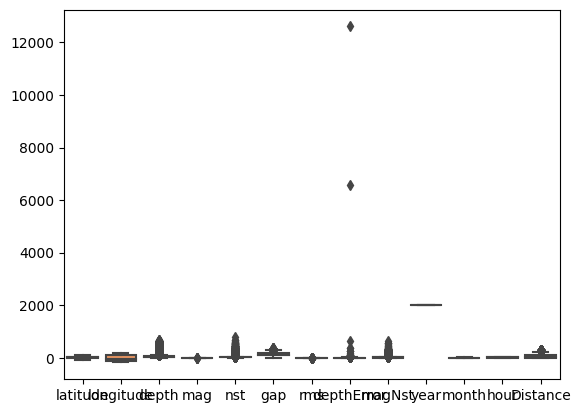

In [56]:
sns.boxplot(data=df_new)

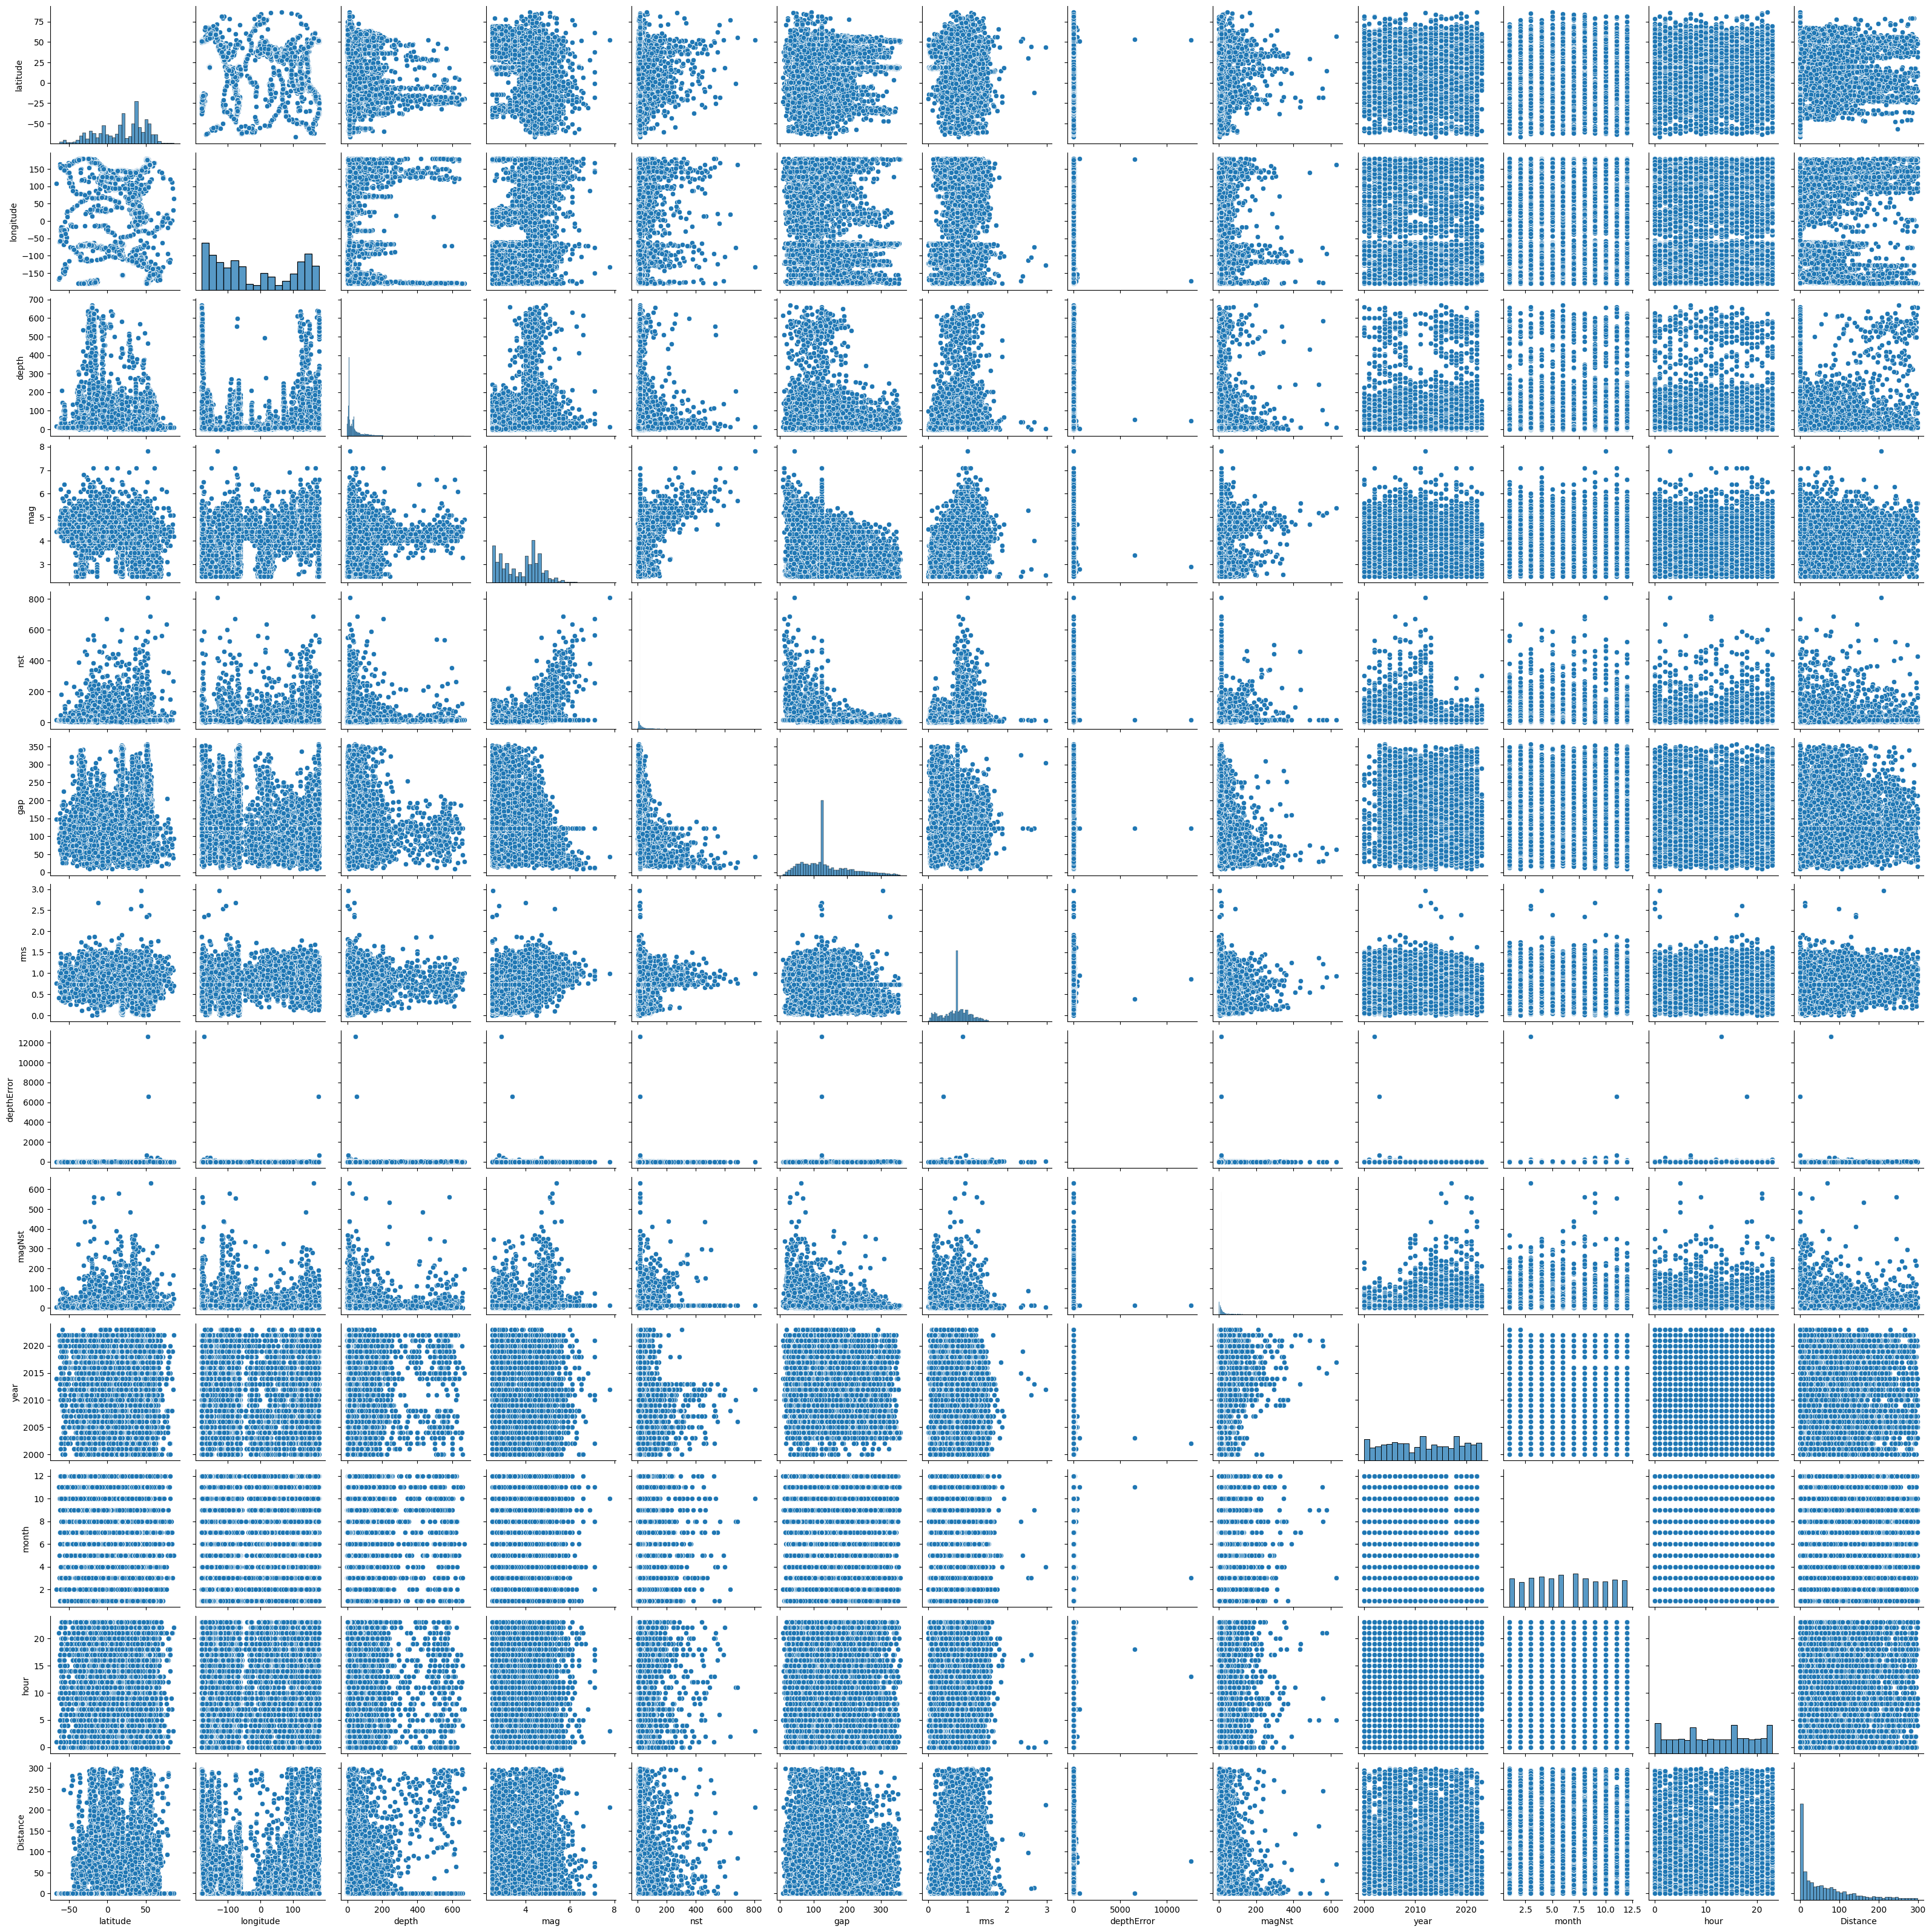

In [57]:
sns.pairplot(data=df_new)

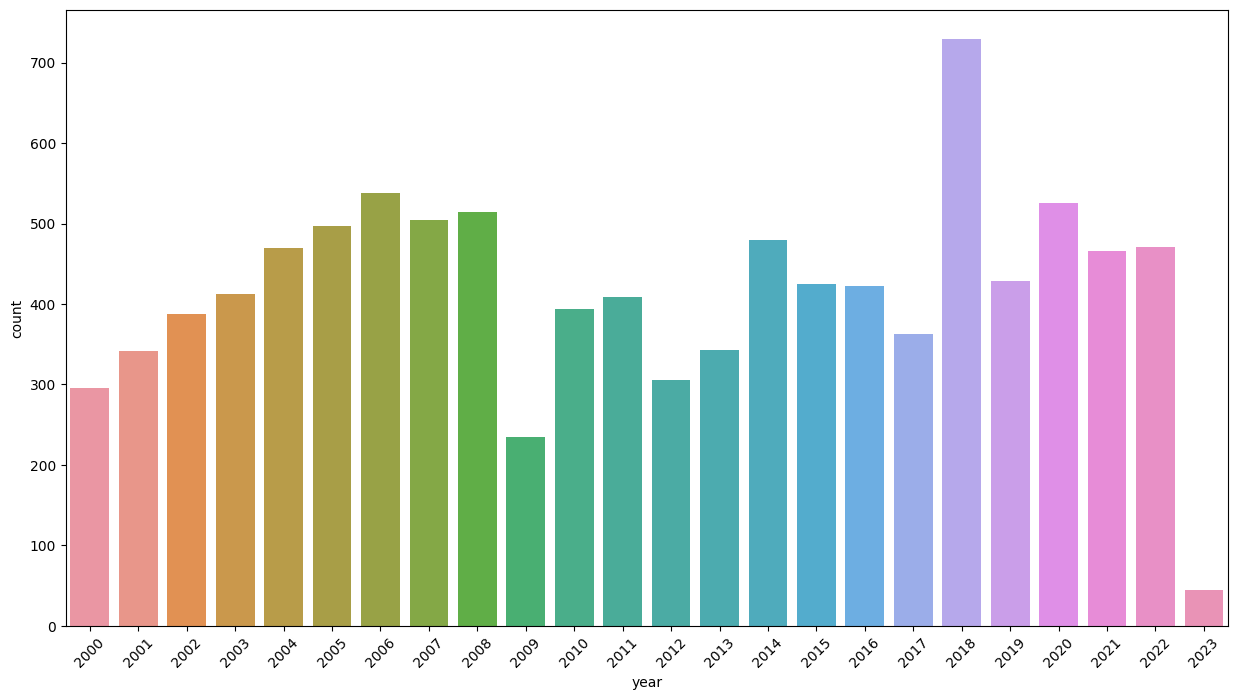

In [58]:
plt.figure(figsize=[15,8])
sns.countplot(data=df_new,x='year')
plt.xticks(rotation=45);

<Axes: xlabel='mag', ylabel='Density'>

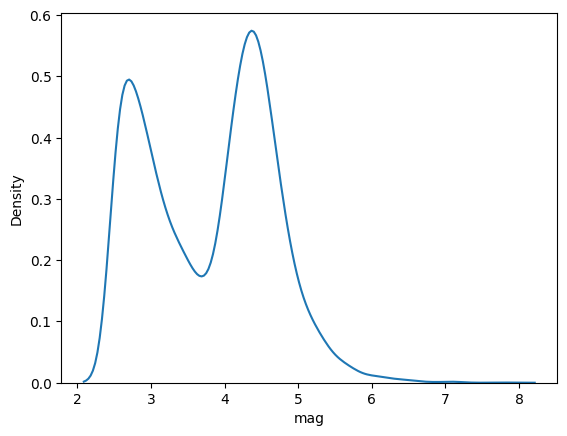

In [59]:
sns.kdeplot(df_new['mag'])

<Axes: xlabel='city', ylabel='Count'>

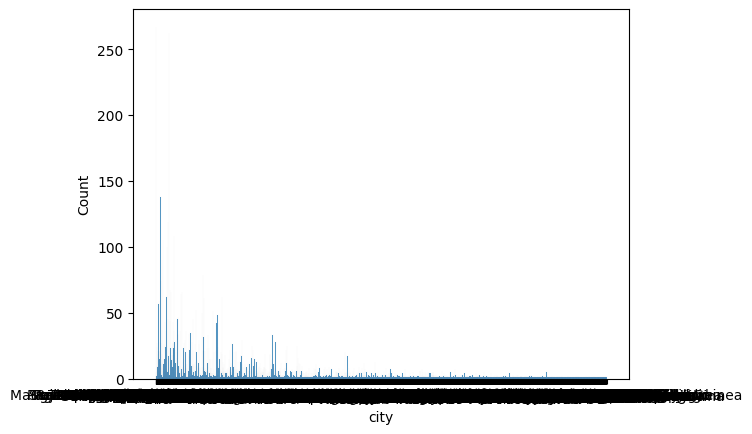

In [60]:
sns.histplot(df_new['city'])

<Axes: xlabel='depth', ylabel='Count'>

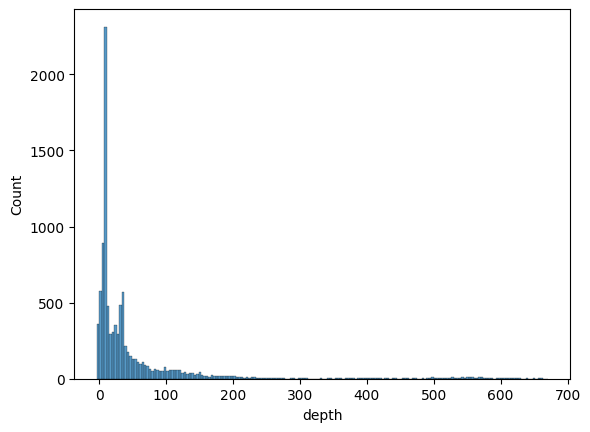

In [61]:
sns.histplot(df_new['depth'])

## Split input and output

In [62]:
X = df_new.drop('mag',axis=1)
y = df_new['mag']

In [63]:
X = pd.get_dummies(X,drop_first=True)
X

latitude   longitude   depth    nst    gap   rms  depthError  magNst  \
482282  19.401667 -155.264667    0.15   29.0   52.0  0.09         0.1    17.0   
374149  55.578100 -161.492900  162.10   18.0  123.1  0.93         6.1    13.0   
95830   17.860000 -105.987000   10.00  123.0   73.1  1.16         3.6    13.0   
368682  13.704600  124.444900   48.05   18.0  106.0  1.00         6.5    58.0   
36978   43.938000   17.471000   10.00   20.0  123.1  0.77         3.6    13.0   
...           ...         ...     ...    ...    ...   ...         ...     ...   
150679  41.480000   24.970000    2.00   10.0   99.0  0.73         3.6    13.0   
261036   5.582000  125.033000   68.50   35.0  107.6  0.88         8.3    10.0   
586748 -16.086400 -175.985400  372.77   18.0   55.0  0.85         4.0    14.0   
48193   16.733000  -60.707000   10.30    4.0  123.1  0.73         3.6    13.0   
309485  36.760000  140.610000   45.00   12.0  167.2  0.58         8.4     1.0   

        year  month  ...  direction_NE  direction_NNE  direction_NNW  \
482282  2018      7  ...             0              0              0   
374149  2014     12  ...             0              0              0   
95830   2004      5  ...             0              0              0   
368682  2014      9  ...             0              0              0   
36978   2001     11  ...             0              0              0   
...      ...    ...  ...           ...            ...            ...   
150679  2006      2  ...             0              0              0   
261036  2010      2  ...             0              0              0   
586748  2022      2  ...             0              0              0   
48193   2002      6  ...             1              0              0   
309485  2012      2  ...             0              0              0   

        direction_NW  direction_NoDirection  direction_S  direction_SE  \
482282             0                      0            0             0   
374149             0                      0            0             0   
95830              0                      0            0             0   
368682             0                      0            0             1   
36978              0                      0            0             0   
...              ...                    ...          ...           ...   
150679             0                      0            0             1   
261036             0                      0            0             0   
586748             0                      1            0             0   
48193              0                      0            0             0   
309485             1                      0            0             0   

        direction_SSE  direction_SW  direction_W  
482282              0             1            0  
374149              0             1            0  
95830               0             1            0  
368682              0             0            0  
36978               0             1            0  
...               ...           ...          ...  
150679              0             0            0  
261036              0             1            0  
586748              0             0            0  
48193               0             0            0  
309485              0             0            0  

[10000 rows x 2763 columns]

## Split data into train and test

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Feature Selection

In [65]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest
fs = SelectKBest(mutual_info_regression,k='all')
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

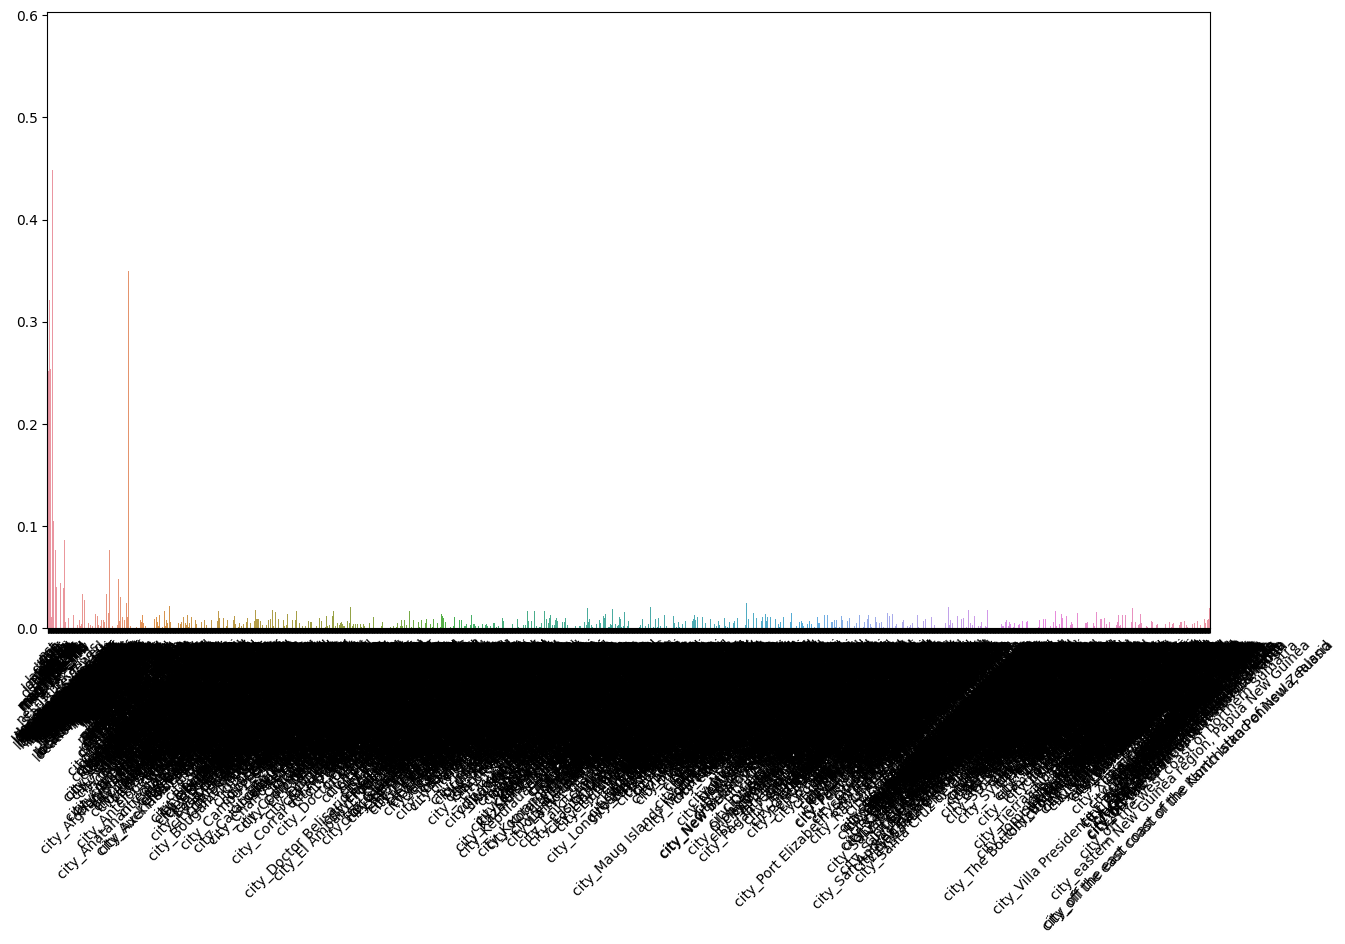

In [66]:
plt.figure(figsize=[15,8])
sns.barplot(x=[i for i in fs.feature_names_in_],y = fs.scores_)
plt.xticks(rotation=45);

In [67]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest
fs = SelectKBest(mutual_info_regression,k=6)
fs.fit(x_train,y_train)
x_train_fs = fs.transform(x_train)
x_test_fs = fs.transform(x_test)

In [68]:
x_train_fs = pd.DataFrame(x_train_fs,columns = fs.get_feature_names_out())
x_train_fs

latitude   longitude   rms  magType_mb  locationSource_us  magSource_us
0      19.0960  -66.825900  0.25         0.0                0.0           0.0
1      18.9610  -64.587000  0.73         0.0                0.0           0.0
2      10.8850   91.523000  1.26         1.0                1.0           1.0
3      36.7570  -98.063167  0.18         0.0                0.0           0.0
4      -4.0019  129.544900  1.13         0.0                1.0           1.0
...        ...         ...   ...         ...                ...           ...
7995   44.1862  140.717100  0.46         1.0                1.0           1.0
7996   54.5838 -161.149100  0.65         0.0                1.0           1.0
7997   35.7050  140.792000  0.80         1.0                1.0           1.0
7998   -5.5056  147.078700  0.67         1.0                1.0           1.0
7999   17.4070 -101.813000  1.49         1.0                1.0           1.0

[8000 rows x 6 columns]

## Scaling

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_fs)
x_test_scaled = sc.transform(x_test_fs)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## Modeling

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_pred_lr = lr.predict(x_test_scaled)
print('R2 for training',lr.score(x_train_scaled,y_train))
print('R2 for testing',lr.score(x_test_scaled,y_test))

R2 for training 0.6300609661698819
R2 for testing 0.6529755873885053


In [71]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train_scaled,y_train)
y_pred_dtr = dt.predict(x_test_scaled)
print('R2 for training',dt.score(x_train_scaled,y_train))
print('R2 for testing',dt.score(x_test_scaled,y_test))

R2 for training 0.9999629428985217
R2 for testing 0.576782249700589


In [72]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train_scaled,y_train)
y_pred_rf = rf.predict(x_test_scaled)
print('R2 for training',rf.score(x_train_scaled,y_train))
print('R2 for testing',rf.score(x_test_scaled,y_test))

R2 for training 0.9667274711997973
R2 for testing 0.7726970620167638


In [73]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train_scaled,y_train)
y_predsvmf = svm.predict(x_test_scaled)
print('R2 for training',svm.score(x_train_scaled,y_train))
print('R2 for testing',svm.score(x_test_scaled,y_test))

R2 for training 0.7498717189016695
R2 for testing 0.7548000948430175


## Cross validation

In [74]:
from sklearn.model_selection import KFold,cross_validate
kfold = KFold(n_splits=10)
scores = cross_validate(rf,x_train_scaled,y_train,cv=kfold)

In [75]:
scores['test_score'].mean()

0.7618301362457646

## Hyper parameter tuning

In [76]:
from sklearn.model_selection import GridSearchCV
parmeter = {'n_estimators':[100,200,300],'max_depth':[5,7,8]}
grid_search = GridSearchCV(rf,param_grid=parmeter,cv=5)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 7, 8],
                         'n_estimators': [100, 200, 300]})

In [77]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 100}

In [78]:
final_rf_model = grid_search.best_estimator_
final_rf_model

RandomForestRegressor(max_depth=8)

In [79]:
final_rf_model.fit(x_train_scaled,y_train)
y_pred_final_rf_model = final_rf_model.predict(x_test_scaled)
print('R2 for training',final_rf_model.score(x_train_scaled,y_train))
print('R2 for testing',final_rf_model.score(x_test_scaled,y_test))

R2 for training 0.8241575415862404
R2 for testing 0.79445511496704
